In [1]:
from tensorflow import keras
from keras import Sequential, layers
from keras.datasets import imdb
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import sklearn.metrics as sklm
import numpy as np
import h5py

# # save np.load
# np_load_old = np.load

# # modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# # call load_data with allow_pickle implicitly set to true
# (x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=88584)

# print(x_train.shape)

# # restore np.load for future normal usage
# np.load = np_load_old
# del(np_load_old)

# # set allow_pickle=True
np.load.__defaults__=(None, True, True, 'ASCII')

print('Loading data...')
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=88584)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# # Reset allow_pickle=False
np.load.__defaults__=(None, False, True, 'ASCII')


word_index = keras.datasets.imdb.get_word_index()

print('preprocessing...')
x_train = keras.preprocessing.sequence.pad_sequences(x_train)
x_test = keras.preprocessing.sequence.pad_sequences(x_test)

x_val = x_train[:5000]
y_val = y_train[:5000]

x_train = x_train[5000:]
y_train = y_train[5000:]

print(x_train.shape)

C:\Users\EAZETNG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\EAZETNG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\EAZETNG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\EAZETNG\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

Loading data...
25000 train sequences
25000 test sequences
preprocessing...
(20000, 2494)


In [2]:
print('build model')
model = Sequential()
# model.add(layers.Embedding(88584, 32))
model.add(layers.Embedding(10000, 32))
model.add(layers.LSTM(32))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print('train model')
history = model.fit(x_train,
              y_train,
              epochs=10,
              batch_size=512,
              validation_split=0.2,
              verbose=1)

build model
Instructions for updating:
Colocations handled automatically by placer.
train model
Instructions for updating:
Use tf.cast instead.
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 623s 39ms/step - loss: 0.6873 - acc: 0.5973 - val_loss: 0.6585 - val_acc: 0.7265
Epoch 2/10
16000/16000 [==============================] - 1300s 81ms/step - loss: 0.5165 - acc: 0.7808 - val_loss: 0.4370 - val_acc: 0.8180
Epoch 3/10
16000/16000 [==============================] - 2055s 128ms/step - loss: 0.3537 - acc: 0.8693 - val_loss: 0.3453 - val_acc: 0.8593
Epoch 4/10
16000/16000 [==============================] - 2174s 136ms/step - loss: 0.2457 - acc: 0.9104 - val_loss: 0.3056 - val_acc: 0.8792
Epoch 5/10
16000/16000 [==============================] - 2423s 151ms/step - loss: 0.1788 - acc: 0.9413 - val_loss: 0.3097 - val_acc: 0.8795
Epoch 6/10
16000/16000 [==============================] - 2759s 172ms/step - loss: 0.1397 - acc: 0.9586 -

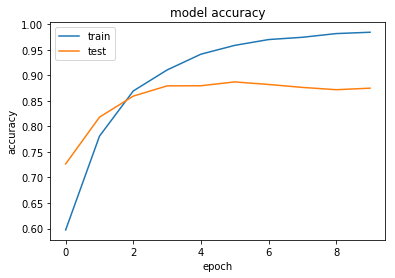

[0.6872774934768677, 0.516531012058258, 0.3537345585823059, 0.24568875741958618, 0.17879498267173768, 0.1397122882604599, 0.10921394908428192, 0.09595163148641586, 0.0753389925956726, 0.06571349328756332]


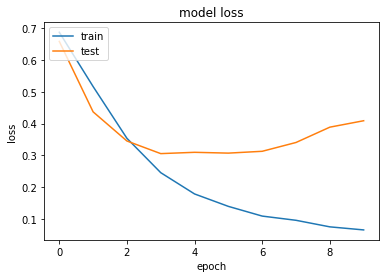

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

print(history.history['loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [21]:
# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("models/model_1.json", "w") as json_file:
    json_file.write(model_json)

print('save trained model...')
model.save('models/sentiment_keras_1.h5')
# # del(model)

# serialize weights to HDF5
model.save_weights("models/model_1.h5")

save trained model...


In [ ]:
# load json and create model
json_file = open("models/model.json", "r")
load_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(load_model_json)
# load weights into new model
loaded_model.load_weights("models/model.h5")

print('load model...')
_model_ = load_model('models/sentiment_keras.h5')

In [4]:
print('evaluation')
evaluation = model.evaluate(x_test, y_test, batch_size=512)
print('Loss:', evaluation[0], 'Accuracy:', evaluation[1])

evaluation
25000/25000 [==============================] - 517s 21ms/step
Loss: 0.44385700984954835 Accuracy: 0.8601199995231629


In [5]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs])

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs)
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [6]:
probabilities = model.predict(x_test)
probabilities

array([[0.19057262],
       [0.9949722 ],
       [0.9549669 ],
       ...,
       [0.0471437 ],
       [0.1240721 ],
       [0.13056067]], dtype=float32)

In [7]:
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 1 1 1 1 1 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 0 0 1 1 0 0 0 1]


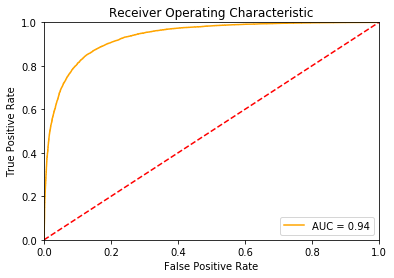

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10495              2005
Actual negative      1492             11008

Accuracy  0.86
 
           Positive      Negative
Num case    12500         12500
Precision    0.88          0.85
Recall       0.84          0.88
F1           0.86          0.86


In [8]:
plot_auc(y_test, probabilities)
print_metrics(y_test, scores)

In [19]:
# sample = 'I hate been here, this place is terrible'
sample = "I love this moment, you are so amazing"
# sample = "I love how you always take good care of your parents"
sample_label = 1
# convert input sentence to tokens based on word_index
inps = [word_index[word] for word in sample.split() if word in word_index]
# the sentence length should be the same as the input sentences
inps = pad_sequences([inps], maxlen=256)

In [20]:
print('Accuracy:', model.evaluate(inps, [sample_label], batch_size=1)[1])
print('Sentiment score: {}'.format(model.predict(inps)[0][0]))

1/1 [==============================] - 0s 38ms/step
Accuracy: 1.0
Sentiment score: 0.5305513143539429


### USING PRE-TRAINED EMBEDDING WEIGHTS

In [5]:
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer(num_words=88584)
# tokenizer.fit_on_texts(x_train)

word_index = keras.datasets.imdb.get_word_index()

# Adding 1 because of reserved 0 index
vocab_size = len(word_index) + 1
maxlen = 100

In [7]:
embeddings_dictionary = dict()
glove_file = open('data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [8]:
embedding_matrix = np.zeros((vocab_size, maxlen))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [9]:
model = Sequential()
embedding_layer = layers.Embedding(vocab_size, maxlen, weights=[embedding_matrix], trainable=False)

model.add(embedding_layer)
# model.add(layers.Embedding(88584, 16))
model.add(layers.LSTM(128))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         8858500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,975,877
Trainable params: 117,377
Non-trainable params: 8,858,500
_________________________________________________________________
None


In [10]:
history = model.fit(x_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.3)
score = model.evaluate(x_test, y_test, verbose=1)

NameError: name 'x_train' is not defined

In [142]:
probabilities = model.predict(x_test)
probabilities

array([[0.9882104 ],
       [0.99635905],
       [0.9881106 ],
       ...,
       [0.00348985],
       [0.00236213],
       [0.97904164]], dtype=float32)

In [143]:
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[1 1 1 1 1 1 1 0 0 1 1 0 0 0 1]
[0 1 1 0 1 1 1 0 0 1 1 0 0 0 1]


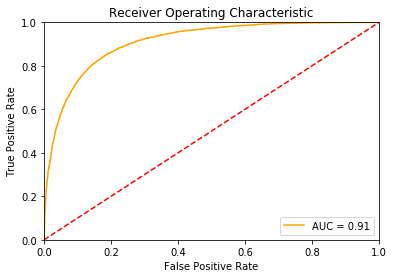

                 Confusion matrix
                 Score positive    Score negative
Actual positive      9972              2528
Actual negative      1702             10798

Accuracy  0.83
 
           Positive      Negative
Num case    12500         12500
Precision    0.85          0.81
Recall       0.80          0.86
F1           0.83          0.84


In [144]:
plot_auc(y_test, probabilities)
print_metrics(y_test, scores)

In [147]:
sample = 'I hate been here, this place is terrible'
# sample = "I love this moment, you're so awesome"
sample_label = 0
# convert input sentence to tokens based on word_index
inps = [word_index[word] for word in sample.split() if word in word_index]
# the sentence length should be the same as the input sentences
inps = pad_sequences([inps], maxlen=256)

In [148]:
print('Accuracy:', model.evaluate(inps, [sample_label], batch_size=1)[1])
print('Sentiment score: {}'.format(model.predict(inps)[0][0]))

1/1 [==============================] - 0s 173ms/step
Accuracy: 0.0
Sentiment score: 0.9549771547317505
